In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from sklearn.datasets import make_circles

dataset = make_circles(n_samples = 1000,
                       noise = 0.1,
                       factor = 0.4,
                       random_state = 0)
dataset = pd.DataFrame(np.hstack((dataset[0], dataset[1].reshape(-1,1))),
                      columns = ['x1', 'x2', 'y'])
dataset

,x1,x2,y
0,0.441882,0.020749,1.0
1,0.004388,-0.252644,1.0
2,-0.786777,-0.757186,0.0
3,0.161325,0.254744,1.0
4,-0.275482,0.316769,1.0
...,...,...,...
995,-0.156760,-0.127834,1.0
996,-0.787354,0.689104,0.0
997,0.006075,0.194267,1.0
998,0.353750,0.232763,1.0


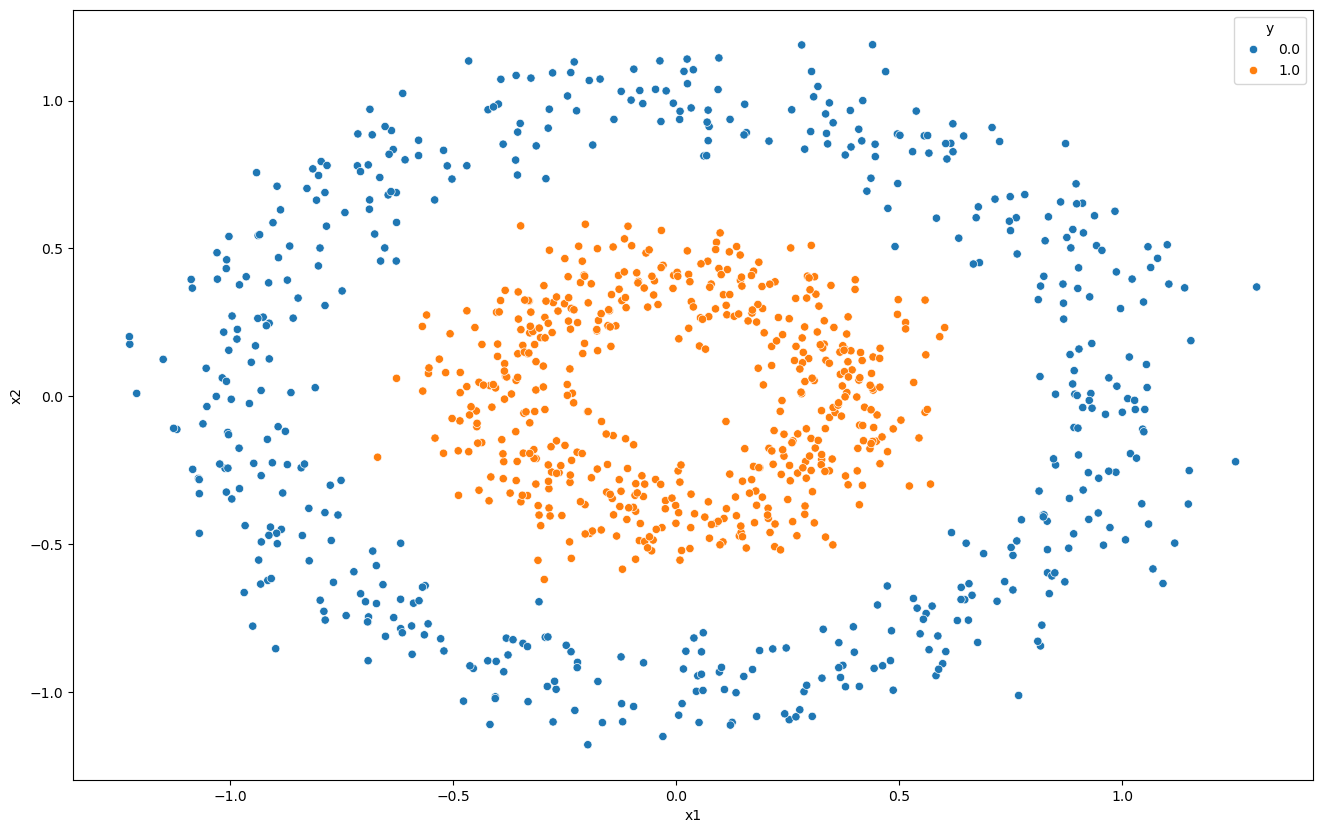

In [4]:
fig = plt.figure()
fig.set_size_inches(16,10)

sns.scatterplot(x = 'x1',
                y = 'x2',
                hue = 'y',
                data = dataset)

plt.show()

C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\jackt\anaconda3\Lib\site-packages\sklearn\clu

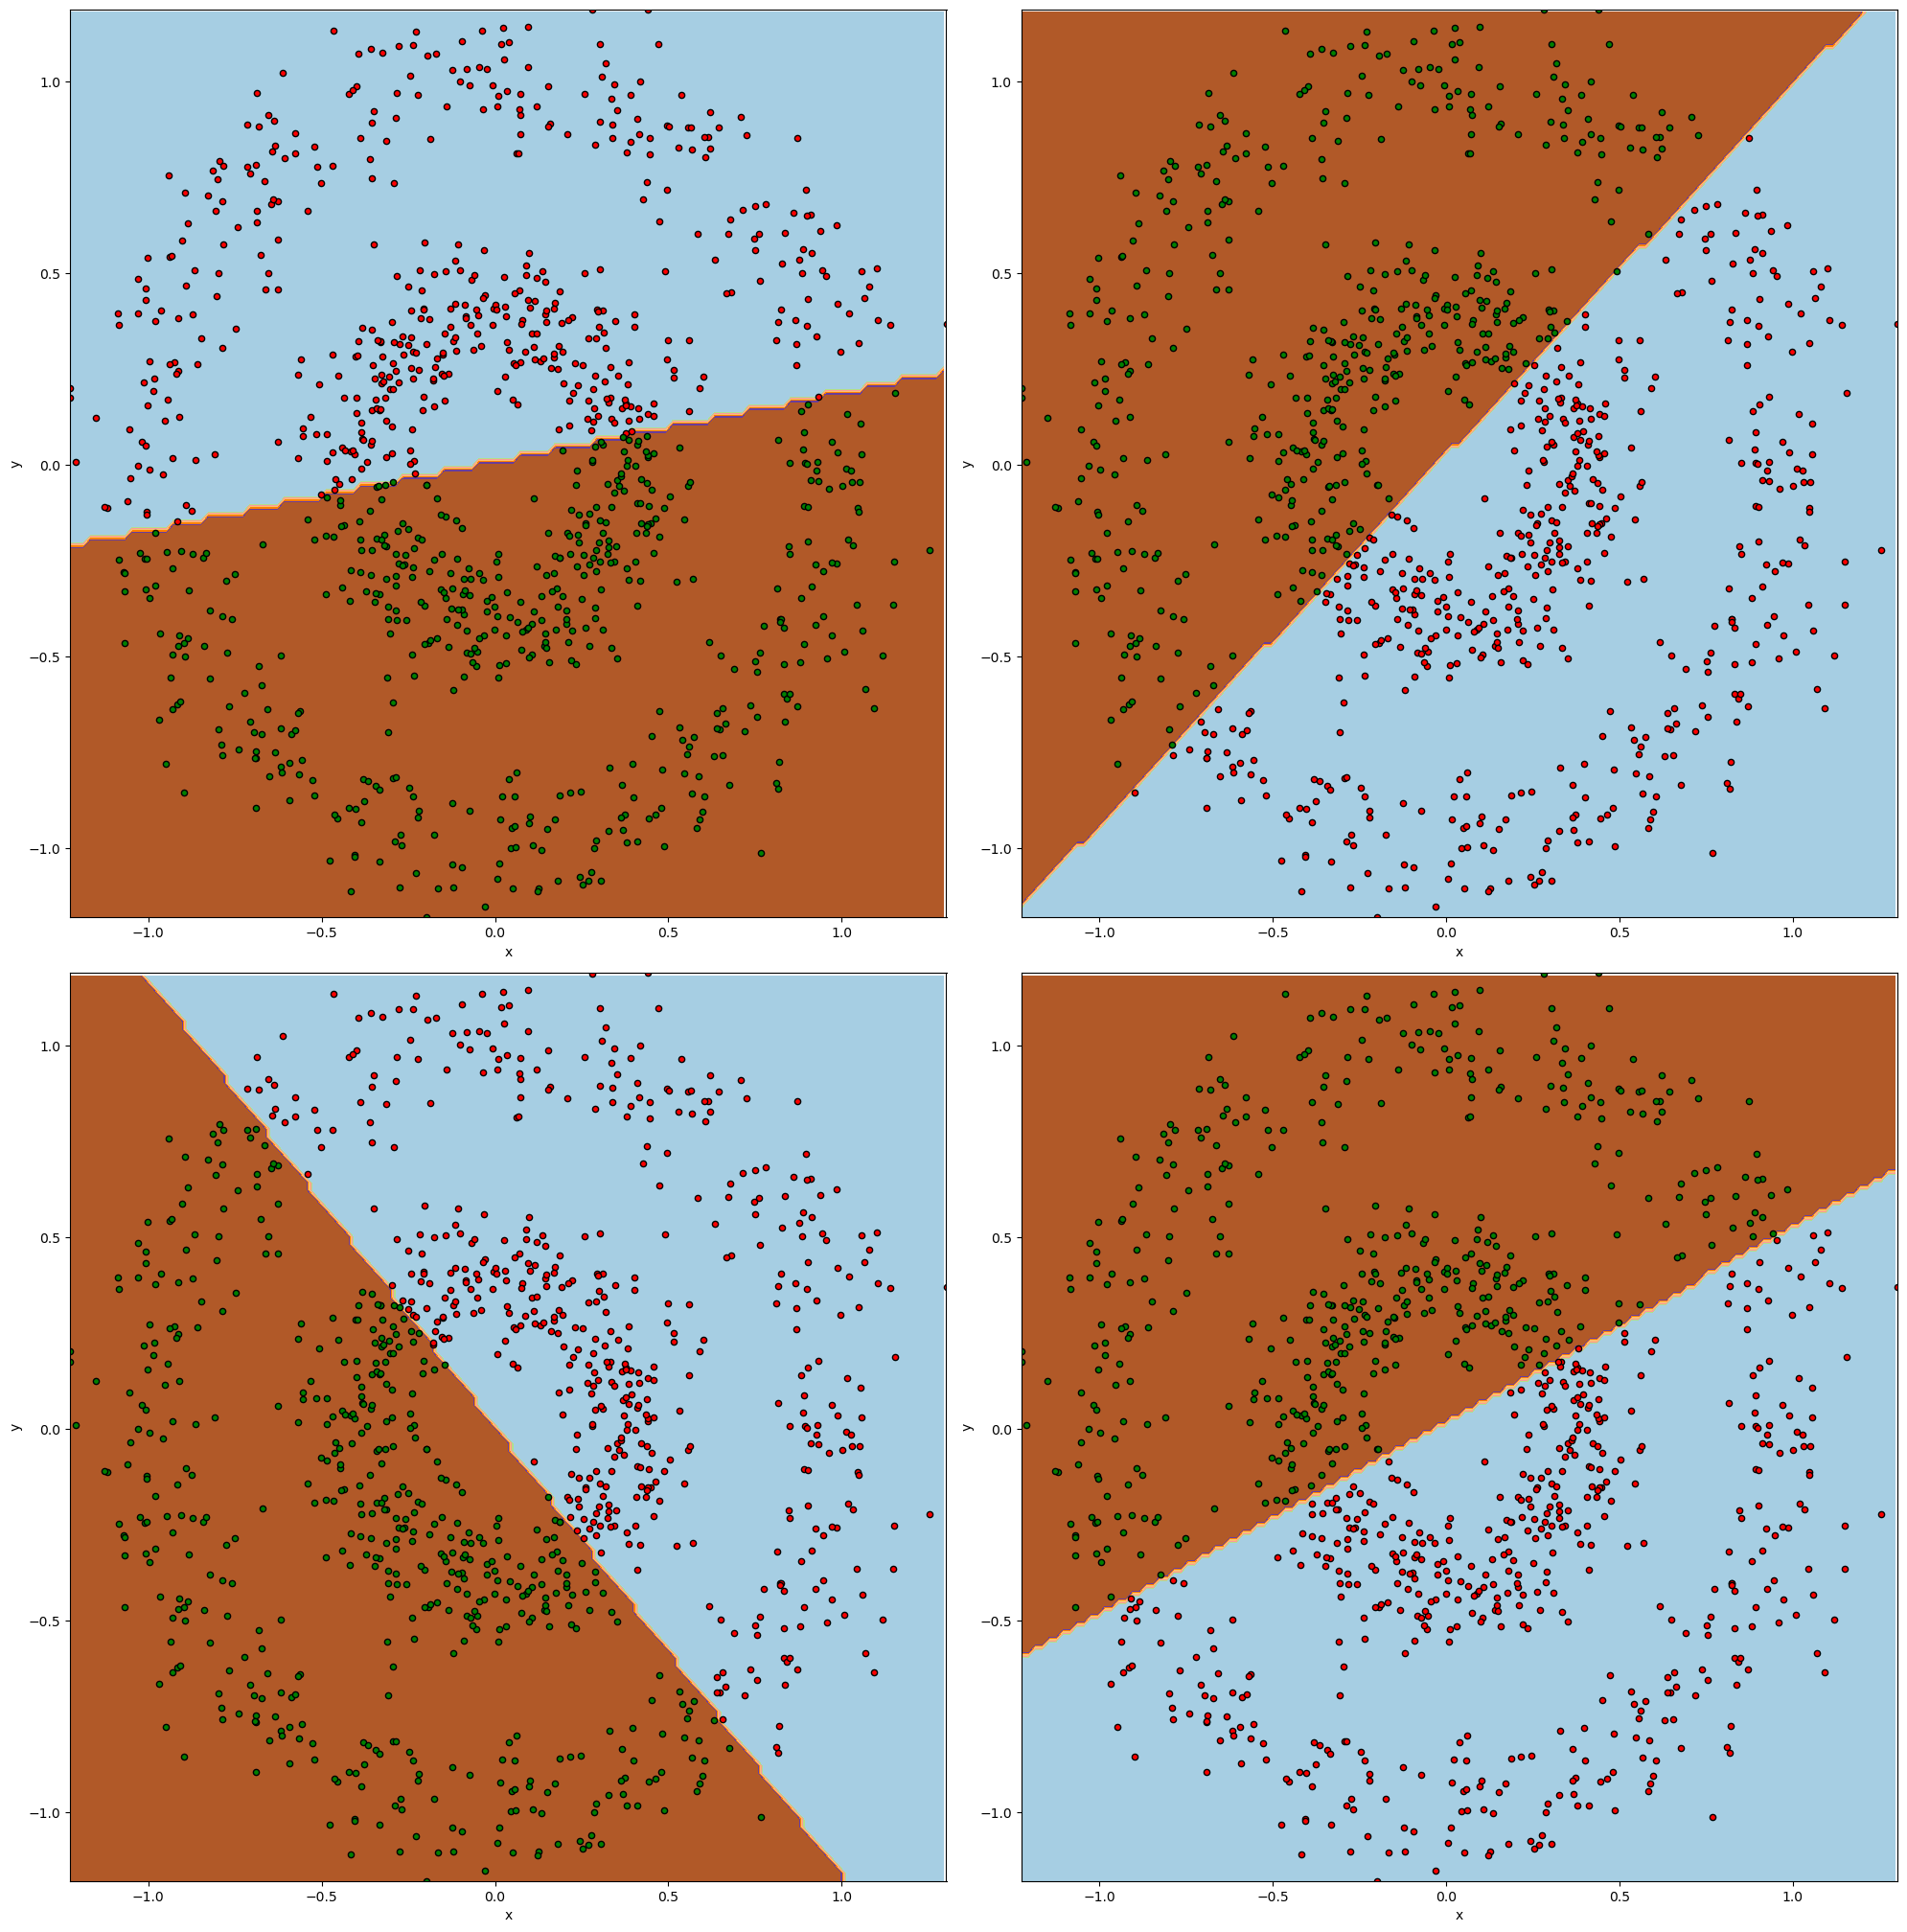

In [5]:
from sklearn.cluster import KMeans

fig = plt.figure()
fig.set_size_inches(20,50)

inits = ['random',
        'k-means++',
        np.array([[1, 1], [0, 0]]),
        np.array([[1, -2], [1, -2]])
        ]

for i,s in enumerate(inits):
    X = dataset[['x1','x2']]
    y = dataset['y']
    kmeans = KMeans(n_clusters = 2, init = s, random_state = 0).fit(X)
    ax_ = fig.add_subplot(5,2,i+1)

    pixel_step = 0.02
    x1_min, x1_max = X.values[:, 0].min(), X.values[:, 0].max()
    x2_min, x2_max = X.values[:, 1].min(), X.values[:, 1].max()

    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, pixel_step),
        np.arange(x2_min, x2_max, pixel_step)
    )

    
    # Для каждой точки даем прогноз 
    Z = kmeans.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    cs = plt.contourf(xx1,xx2,Z,cmap = plt.cm.Paired)
    plt.axis('tight')

    y = kmeans.predict(X)
    for i, c in zip(range(2), ['red', 'green']):
        idx = np.where(y == i)
        plt.scatter(
            X.values[idx, 0],
            X.values[idx, 1],
            c = c,
            s = 20,
            edgecolor = 'k'
        )
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.xlabel('x')
    plt.ylabel('y')

fig.tight_layout()
plt.show()

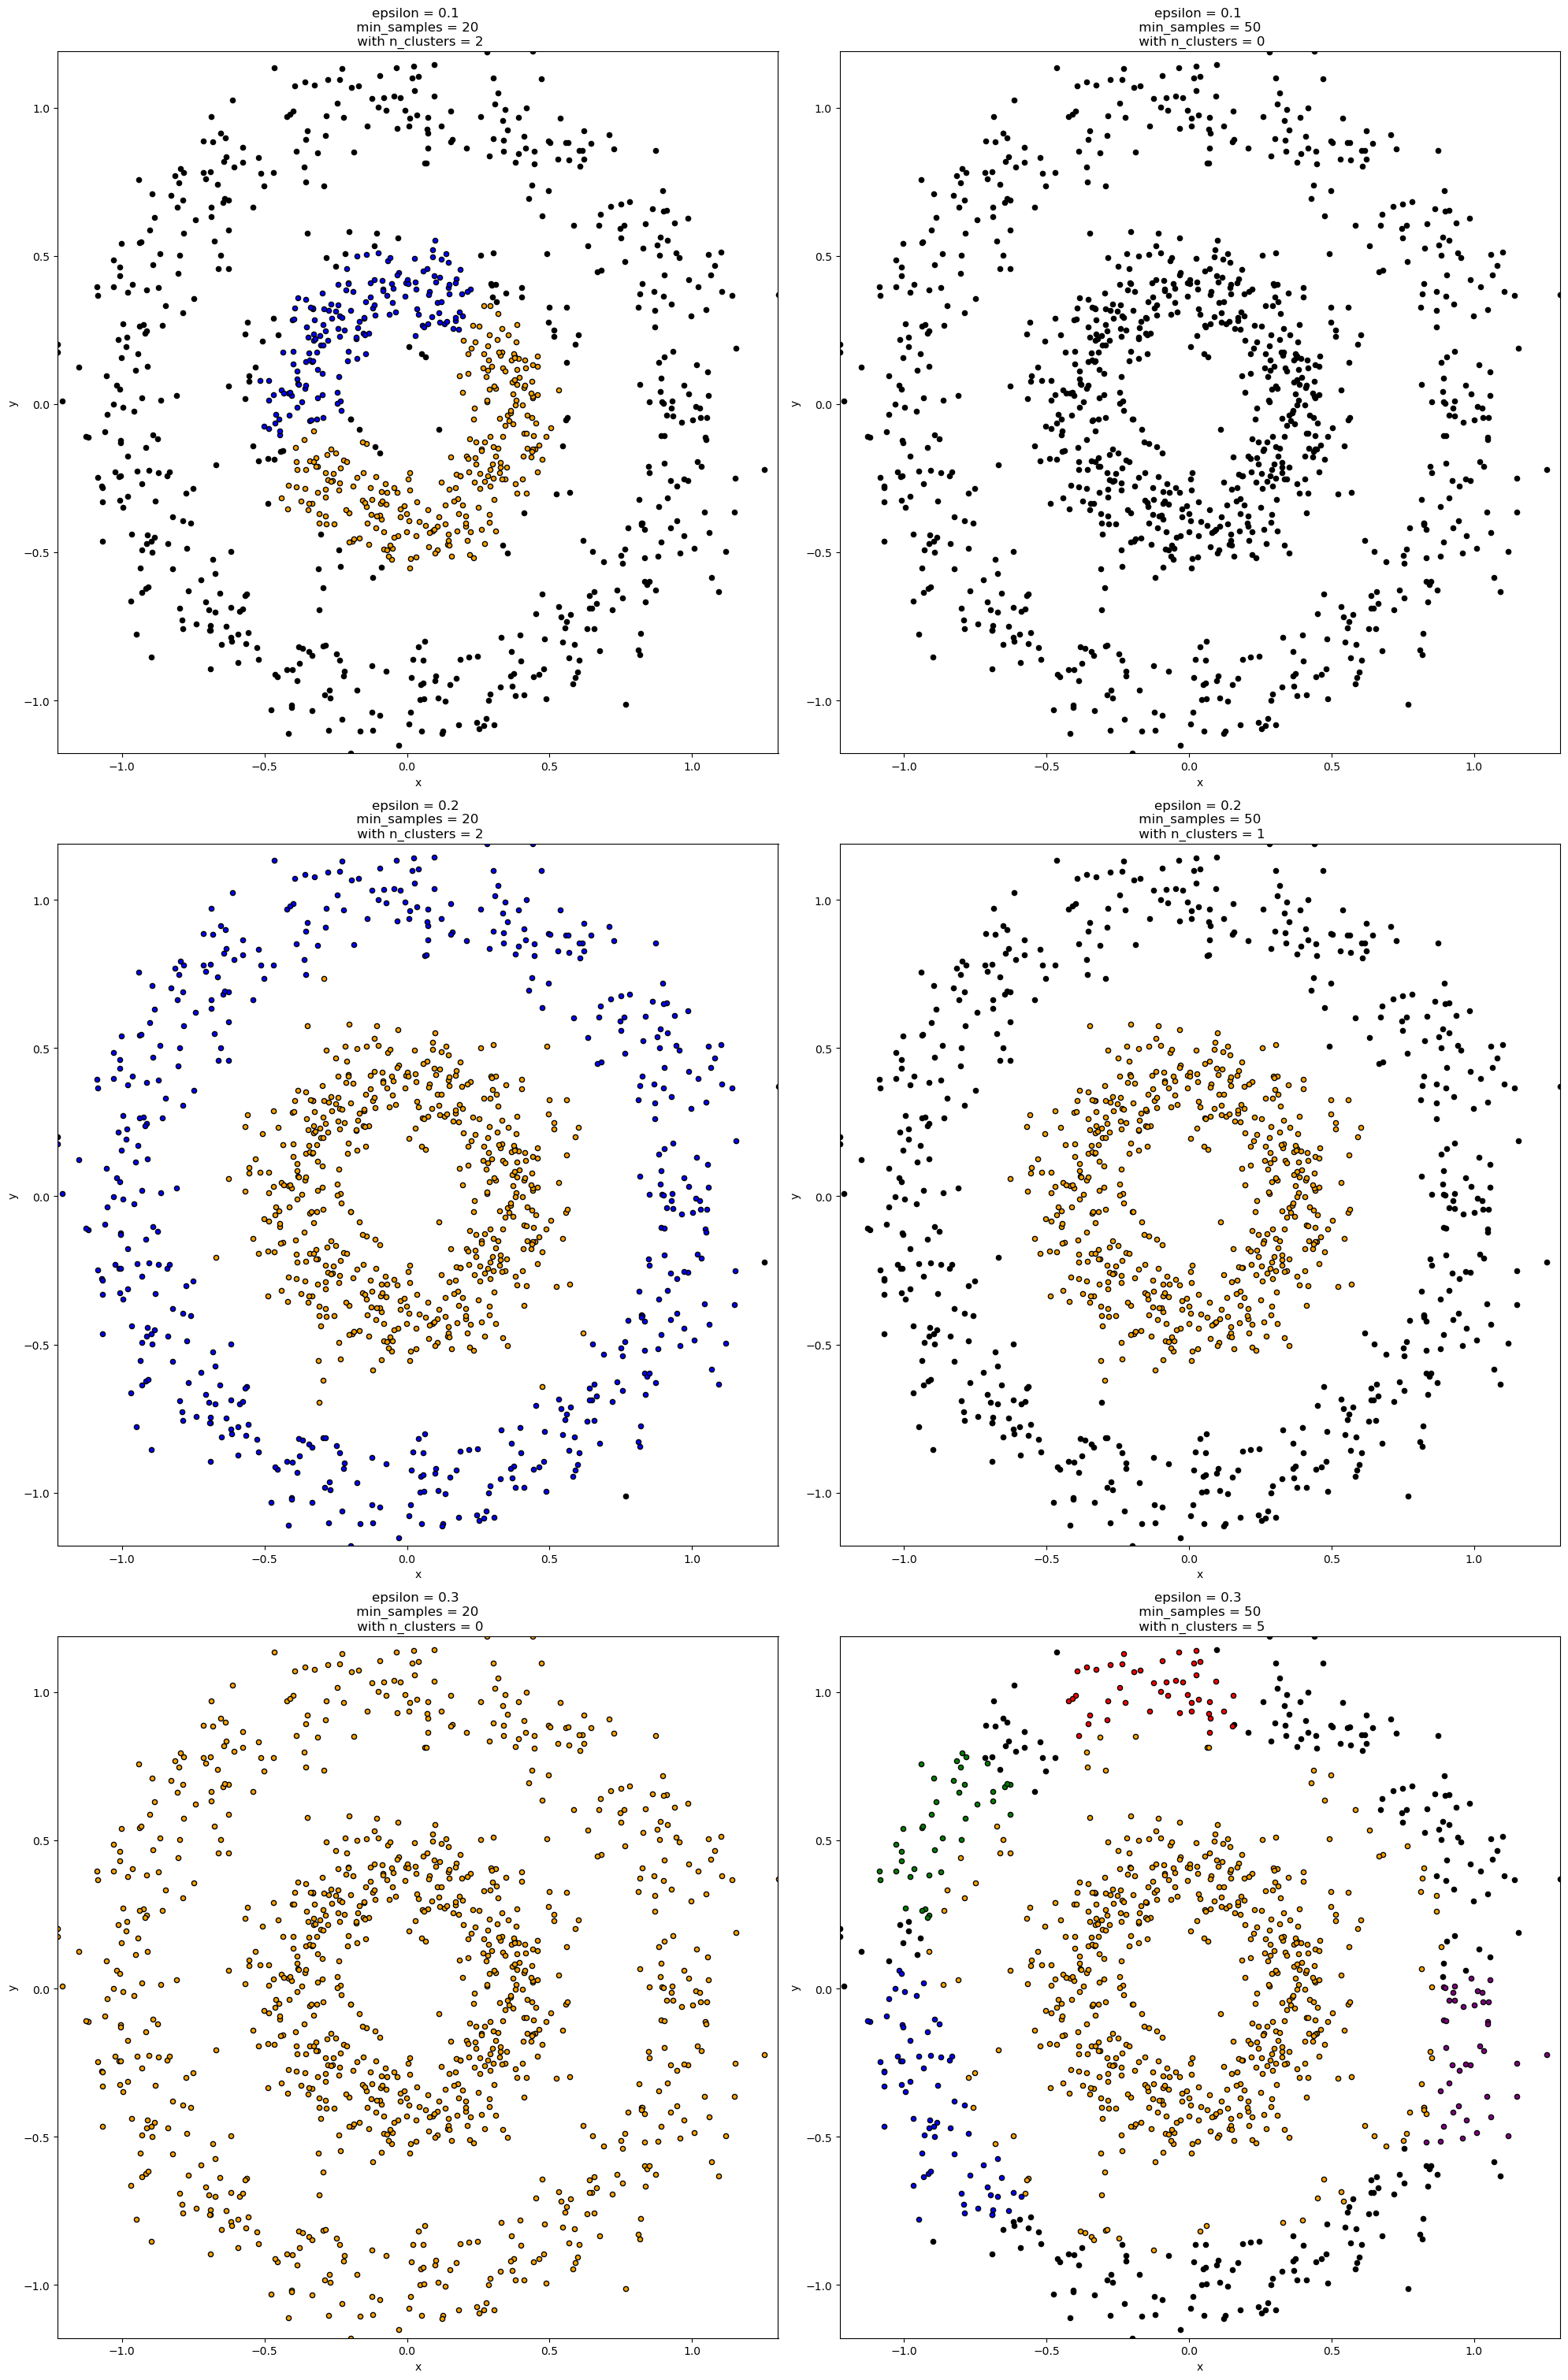

In [6]:
pairs_of_hyperparams = [
    [0.1, 20],
    [0.1, 50],
    [0.2, 20],
    [0.2, 50],
    [0.3, 20],
    [0.3, 50],
]

from sklearn.cluster import DBSCAN
fig = plt.figure()
fig.set_size_inches(20,50)

for i,s in enumerate(pairs_of_hyperparams):
    X = dataset[['x1','x2']]
    dbscan = DBSCAN(eps = s[0], min_samples = s[1]).fit(X)
    ax_ = fig.add_subplot(5,2,i+1)

    colors = ['black', 'orange', 'blue', 'purple', 'green', 'red']

    y = dbscan.labels_
    labels = sorted(list(set(dbscan.labels_)))

    
    if len(labels)==1 and y[0]==0:
        colors = {0: 'orange'}
    else:
        colors = dict(zip(labels, colors))
    
    for i, c in zip(labels, colors.values()):
        idx = np.where(y == i)
        plt.scatter(
            X.values[idx, 0],
            X.values[idx, 1],
            c = c,
            s = 20,
            edgecolor = 'k'
        )
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.xlabel('x')
    plt.ylabel('y')

    if len(y)==1 and y[0]==0:
        n_clusters = 1
    else:
        n_clusters = len(set(y))-1
    plt.title(f'epsilon = {s[0]} \n min_samples = {s[1]} \n with n_clusters = {n_clusters}')

fig.tight_layout()
plt.show()

In [7]:
import pandas as pd
data = pd.read_excel('processed_segmentation.xlsx')
data.head()

,Age,Work_Experience,Family_Size,Segmentation,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_B,Profession_C,Profession_D,Spending_Score_High,Spending_Score_Low,Var_1_B,Var_1_C,Var_1_D
0,22,1.000000,4.0,D,1,0,0,0.075826,0.109610,0.734985,0,1,0.213039,0.100092,0.381084
1,38,2.641663,3.0,A,0,1,1,0.270386,0.107296,0.251788,0,0,0.213039,0.100092,0.381084
2,67,1.000000,1.0,B,0,1,1,0.270386,0.107296,0.251788,0,1,0.234287,0.285472,0.248400
3,67,0.000000,2.0,B,1,1,1,0.253612,0.224719,0.205457,1,0,0.234287,0.285472,0.248400
4,40,2.641663,6.0,A,0,1,1,0.232877,0.155954,0.226554,1,0,0.234287,0.285472,0.248400


In [10]:
X = data.drop('Segmentation', axis = 1)
Y = data['Segmentation']

In [14]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components = 2).fit_transform(X)
X_tsne

array([[-85.13753   ,   8.760283  ],
       [ -1.1646278 ,  18.436012  ],
       [ 44.031574  ,  11.669224  ],
       ...,
       [-24.366486  , -43.93437   ],
       [-58.68193   , -34.131744  ],
       [ -8.855613  ,   0.83766586]], dtype=float32)

In [15]:
X_tsne = np.concatenate((X_tsne, Y.values.reshape(-1,1)),
                       axis = 1)
X_tsne = pd.DataFrame(X_tsne, columns = ['TSNE_1st_component','TSNE_2nd_component','SEGMENT'])
X_tsne

,TSNE_1st_component,TSNE_2nd_component,SEGMENT
0,-85.137527,8.760283,D
1,-1.164628,18.436012,A
2,44.031574,11.669224,B
3,51.033573,16.566084,B
4,6.317863,10.473723,A
...,...,...,...
8063,-76.118042,16.427862,D
8064,-9.656276,19.839312,D
8065,-24.366486,-43.934368,D
8066,-58.681931,-34.131744,B


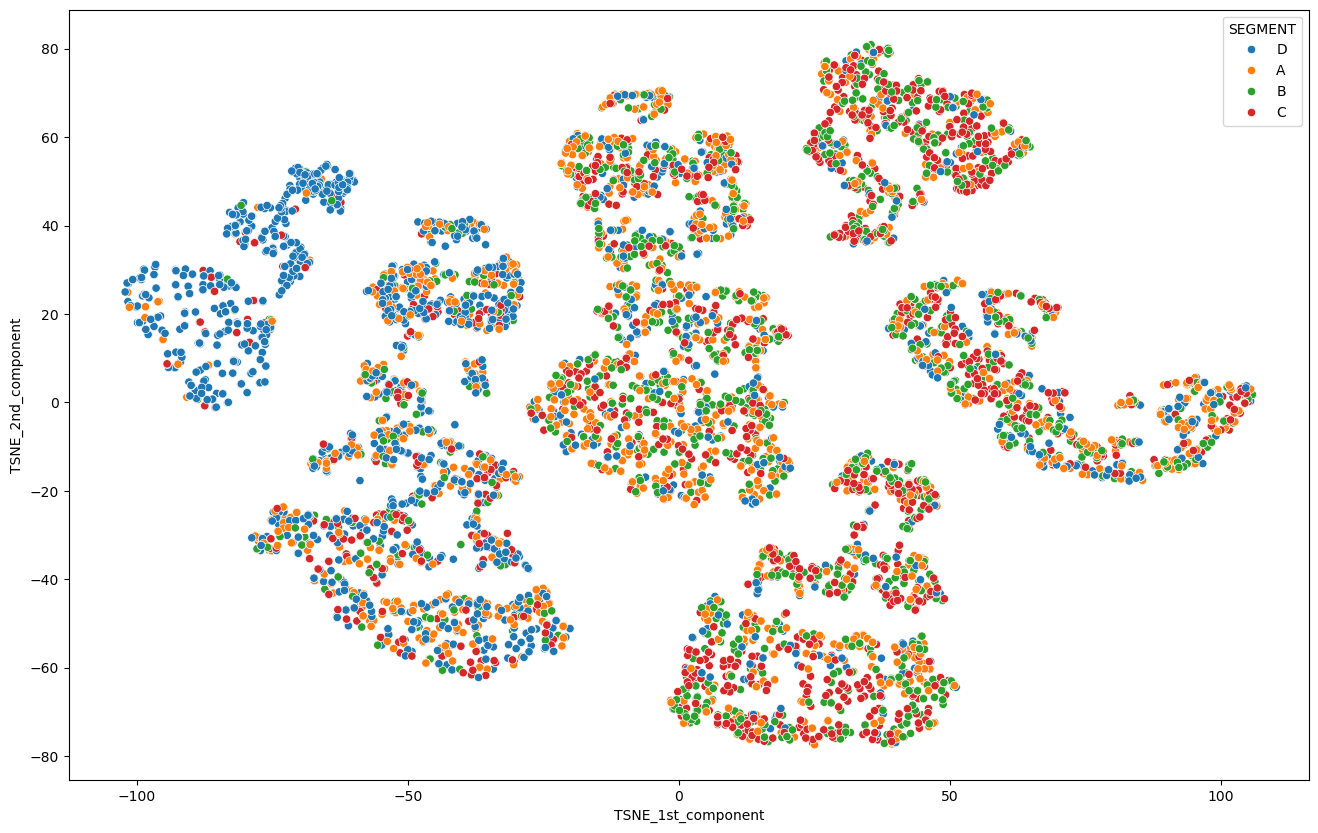

In [16]:
fig = plt.figure()
fig.set_size_inches(16,10)

sns.scatterplot(data = X_tsne, x = 'TSNE_1st_component',
               y = 'TSNE_2nd_component',
               hue = 'SEGMENT')

plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans_segm = KMeans(n_clusters = 4).fit(X_scaled)
k_means_labels = kmeans_segm.predict(X_scaled)

X_tsne_with_kmeans_preds = pd.concat(
    (
        X_tsne, pd.DataFrame({"KMEANS label": k_means_labels})
    ),
    axis = 1
)

X_tsne_with_kmeans_preds.head()

,TSNE_1st_component,TSNE_2nd_component,SEGMENT,KMEANS label
0,-85.137527,8.760283,D,0
1,-1.164628,18.436012,A,3
2,44.031574,11.669224,B,2
3,51.033573,16.566084,B,1
4,6.317863,10.473723,A,1


In [21]:
import itertools
accuracies = {}
for perm in itertools.permutations(X_tsne['SEGMENT'].unique()):

    vv = dict(zip(perm, [0, 1, 2, 3]))
    mapping = X_tsne_with_kmeans_preds['SEGMENT'].map(vv)
    acc = (mapping == X_tsne_with_kmeans_preds['KMEANS label']).mean()

    accuracies[perm] = acc

print(f'{max(accuracies.values())} for {max(accuracies, key = accuracies.get)} combination')

0.44707486365889937 for ('D', 'C', 'A', 'B') combination


In [22]:
real_cluster_names = dict(zip([0, 1, 2, 3], max(accuracies, key = accuracies.get)))
real_cluster_names

{0: 'D', 1: 'C', 2: 'A', 3: 'B'}

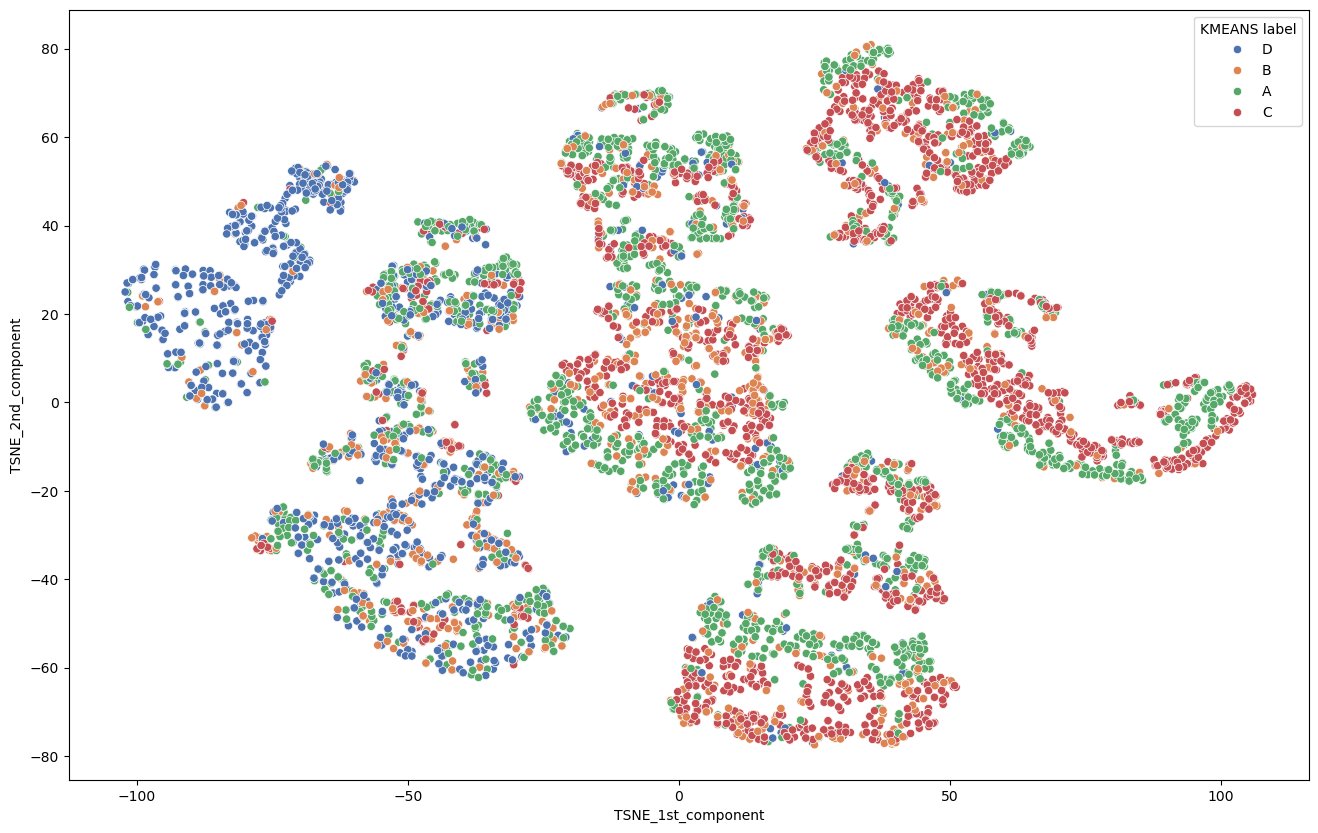

In [25]:
fig = plt.figure()
fig.set_size_inches(16,10)

X_inv = X_tsne_with_kmeans_preds.copy()
X_inv['KMEANS label'] = X_inv['KMEANS label'].map(real_cluster_names)

sns.scatterplot(data = X_inv,
               x = 'TSNE_1st_component',
               y = 'TSNE_2nd_component',
               hue = 'KMEANS label',
               palette = 'deep')

plt.show()